# **Second lab assignment WUM**

Author: Iga Jeznacka

---

## 1. Building baseline models

### Loading the data and importing Python libraries

In [ ]:
!pip install gdown
!pip install --upgrade gdown
!gdown https://drive.google.com/uc?id=19giFsIxPewmQUtsgynr8nuAQRPDVZTEF

Downloading...
From: https://drive.google.com/uc?id=19giFsIxPewmQUtsgynr8nuAQRPDVZTEF
To: /content/zad2_wum_data_for_students.csv
100% 14.6M/14.6M [00:00<00:00, 91.4MB/s]


In [ ]:
# Import libraries
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, root_mean_squared_error, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load and inspect database
data = pd.read_csv('zad2_wum_data_for_students.csv', sep=';', header=0)
print('Output')
print(data['Output'].describe())
print(data['Class'].value_counts())
data.head()

Output
count    2000.000000
mean        0.106647
std         3.562855
min       -12.384019
25%        -2.310265
50%         0.140658
75%         2.435991
max        11.676146
Name: Output, dtype: float64
Class
1    1013
0     987
Name: count, dtype: int64


,Class,Output,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,...,Input391,Input392,Input393,Input394,Input395,Input396,Input397,Input398,Input399,Input400
0,0,0.800586,-0.002583,2.184037,-0.322008,1.621241,1.192444,-0.278356,-0.207366,0.735689,...,-2.140861,1.187660,0.345238,-0.844885,0.580007,-2.605781,-0.299471,0.711487,-0.753316,0.728763
1,0,2.168475,0.668637,1.373933,-0.476868,-0.724704,0.031162,-1.845921,0.784890,1.508526,...,-1.286120,-0.900044,-0.500399,-0.126421,-0.632233,-2.557419,0.056044,0.634774,-0.259835,0.106390
2,1,-1.210777,-0.681438,-0.544753,0.441346,-0.019906,-0.192135,-0.162510,-0.998777,0.686472,...,-0.391605,-0.190147,0.793746,-0.812737,-0.068228,-0.313143,2.564096,0.848355,0.180556,-1.525615
3,1,0.505678,-0.497957,0.720712,0.149120,0.019251,1.377850,0.981337,-0.846813,0.036790,...,-0.176734,-0.947351,-0.888601,1.509450,-0.501929,-0.554909,-0.104051,0.442150,-0.056644,1.447267
4,1,-10.281033,-1.178544,0.176941,1.112202,1.234189,0.999451,-0.773329,-0.811075,1.550537,...,-0.181325,0.198960,-0.697497,-0.836371,1.652071,0.974292,1.584071,-0.202352,1.362426,1.023857


The output variable takes values between -12.38 and 11.68, with 50% of values being between -2.31 and 2.43.

The class variable is divided relatively equally between the two classes.

### Performing logistic regression

In [ ]:
X = data.iloc[:, 2:]
y = data['Class']

# Divide data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
lr = LogisticRegression().fit(X_train, y_train)

# Evaluate model on train data
y_train_pred = lr.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)

baseline_scores_clas = {'train': accuracy_score(y_train, y_train_pred)}
print(f'Accuracy score for train data: {baseline_scores_clas["train"]:.4f}')
print(f'Confusion matrix: \n{cm}')

# Evaluate model on test data
y_test_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

baseline_scores_clas['test'] = accuracy_score(y_test, y_test_pred)
print(f'Accuracy score for test data: {baseline_scores_clas["test"]:.4f}')
print(f'Confusion matrix: \n{cm}')

Accuracy score for train data: 0.7429
Confusion matrix: 
[[497 183]
 [177 543]]
Accuracy score for test data: 0.5183
Confusion matrix: 
[[144 163]
 [126 167]]


I have divided data into train and test subsets to estimate model's performance on new data.

For train data, accuracy score is not bad, given that both classes are fairly balanced.

Accuracy on test data is close to what could be achieved choosing randomly or always assigning the same class. Confusion matrix shows sensitivity is very low, with a bit better specifity, meaning model could be picking class 1 too often.

Results on test data prove that the model is unsatisfactory.

### Performing linear regression

In [ ]:
X = data.iloc[:, 2:]
X = sm.add_constant(X)
y = data['Output']

# Divide data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
ols = sm.OLS(y_train, X_train).fit()

# Evaluate model on train data
baseline_scores_reg = {'train': ols.rsquared}
print(f'R2 score for train data: {baseline_scores_reg["train"]:.4f}')
print(f'Root mean squared error for train data: {math.sqrt(ols.mse_total):.4f}')

# Evaluate model on test data
y_pred = ols.predict(X_test)
baseline_scores_reg['test'] = r2_score(y_test, y_pred)
print(f'R2 score for test data: {baseline_scores_reg["test"]:.4f}')
print(f'Root mean squared error for test data: {root_mean_squared_error(y_test, y_pred):.4f}')

R2 score for train data: 0.6379
Root mean squared error for train data: 3.5956
R2 score for test data: 0.3616
Root mean squared error for test data: 2.7777


On train data, the $R^2$ score is above 0.5, showing moderately accurate model. The RMSE of nearly 3.6 is higher than standard deviation of output values, which is alarming.

On test data, the $R^2$ score is much lower, meaning the model is likely overfitting. The RMSE is around 2.78, which is not far from train data.

Results on test data show the model needs adjusting.

## 2. Support Vector Classification

In [ ]:
# Import libraries
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

### Using SelectKBest for feature selection

I will be trying to optimize an SVM model with rgb kernel, since the correlation between variables might not be linear. For tuning parameters, I will use GridSearch with 5-fold cross-validation.

In [ ]:
X = data.iloc[:, 2:]
y = data['Class']

# Divide data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use SelectKBest for feature selection
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('svm', svm.SVC(kernel='rbf'))
])

# Search for the parameters for both feature selection and SVM
param_grid = {
    'feature_selection__k': [10, 50, 100, 150],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 1, 10]
}

svm_cv = GridSearchCV(pipeline, param_grid, cv=5)
svm_cv.fit(X_train, y_train)

print(f'Best parameters: {svm_cv.best_params_}')
print(f'Mean cross-validated score: {svm_cv.best_score_:.4f}')

Best parameters: {'feature_selection__k': 10, 'svm__C': 1, 'svm__gamma': 1}
Mean cross-validated score: 0.7571


Based on chosen best parameters, I will adjust grid parameters to inspect values more precisely on a smaller range.

In [ ]:
# Adjust the parameters
param_grid = {
    'feature_selection__k': [5, 10, 15, 20, 25],
    'svm__C': [0.5, 1, 3, 5, 7],
    'svm__gamma': [0.1, 0.5, 0.75, 1, 1.5]
}

svm_cv = GridSearchCV(pipeline, param_grid, cv=5)
svm_cv.fit(X_train, y_train)

print(f'Best parameters: {svm_cv.best_params_}')
print(f'Mean cross-validated score: {svm_cv.best_score_:.4f}')

Best parameters: {'feature_selection__k': 10, 'svm__C': 1, 'svm__gamma': 0.5}
Mean cross-validated score: 0.7664


In [ ]:
# Further adjust the parameters
param_grid = {
    'feature_selection__k': [6, 7, 8, 9, 10, 11, 12, 13],
    'svm__C': [0.5, 0.8, 1, 3, 5],
    'svm__gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

svm_cv = GridSearchCV(pipeline, param_grid, cv=5)
svm_cv.fit(X_train, y_train)

print(f'Best parameters: {svm_cv.best_params_}')
print(f'Mean cross-validated score: {svm_cv.best_score_:.4f}')

Best parameters: {'feature_selection__k': 7, 'svm__C': 5, 'svm__gamma': 0.6}
Mean cross-validated score: 0.7807


In [ ]:
svm_scores = {'train': svm_cv.score(X_train, y_train), 'test': svm_cv.score(X_test, y_test)}

print(f'Train score: {svm_scores["train"]:.4f}')
print(f'Confusion matrix: \n{confusion_matrix(y_train, svm_cv.predict(X_train))}')
print(f'Test score: {svm_scores["test"]:.4f}')
print(f'Confusion matrix: \n{confusion_matrix(y_test, svm_cv.predict(X_test))}')

Train score: 0.9064
Confusion matrix: 
[[610  70]
 [ 61 659]]
Test score: 0.7917
Confusion matrix: 
[[231  76]
 [ 49 244]]


The model is significantly better than baseline one, with good performace on test data. The huge difference between accuracy on full train data and test data might mean the model is overfitting. I will test using different method for feature selection.

### Using RandomForestClassifier for feature selection

In [ ]:
# Use RandomForestClassifier and SelectFromModel for feature selection
pipeline_rfc = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
    ('svm', svm.SVC(kernel='rbf'))
])

# Search for the parameters for both feature selection and SVM
param_grid = {
    'feature_selection__max_features': [5, 10, 15, 20],
    'svm__C': [0.1, 1, 5],
    'svm__gamma': [0.01, 0.1, 1]
}

svm_cv_rfc = GridSearchCV(pipeline_rfc, param_grid, cv=5)
svm_cv_rfc.fit(X_train, y_train)

print(f'Best parameters: {svm_cv_rfc.best_params_}')
print(f'Mean cross-validated score: {svm_cv_rfc.best_score_:.4f}')

Best parameters: {'feature_selection__max_features': 10, 'svm__C': 1, 'svm__gamma': 1}
Mean cross-validated score: 0.8114


In [ ]:
# Adjust the parameters
param_grid = {
    'feature_selection__max_features': [8, 10, 12, 14],
    'svm__C': [0.5, 1, 1.5, 3],
    'svm__gamma': [0.1, 0.5, 1, 1.5]
}

svm_cv_rfc = GridSearchCV(pipeline_rfc, param_grid, cv=5)
svm_cv_rfc.fit(X_train, y_train)

print(f'Best parameters: {svm_cv_rfc.best_params_}')
print(f'Mean cross-validated score: {svm_cv_rfc.best_score_:.4f}')

Best parameters: {'feature_selection__max_features': 8, 'svm__C': 3, 'svm__gamma': 1}
Mean cross-validated score: 0.8257


In [ ]:
svm_scores_rfc = {'train': svm_cv_rfc.score(X_train, y_train), 'test': svm_cv_rfc.score(X_test, y_test)}

print(f'Train score: {svm_scores_rfc["train"]:.4f}')
print(f'Confusion matrix: \n{confusion_matrix(y_train, svm_cv_rfc.predict(X_train))}')
print(f'Test score: {svm_scores_rfc["test"]:.4f}')
print(f'Confusion matrix: \n{confusion_matrix(y_test, svm_cv_rfc.predict(X_test))}')

Train score: 0.9529
Confusion matrix: 
[[647  33]
 [ 33 687]]
Test score: 0.8033
Confusion matrix: 
[[239  68]
 [ 50 243]]


<Figure size 1200x1200 with 0 Axes>

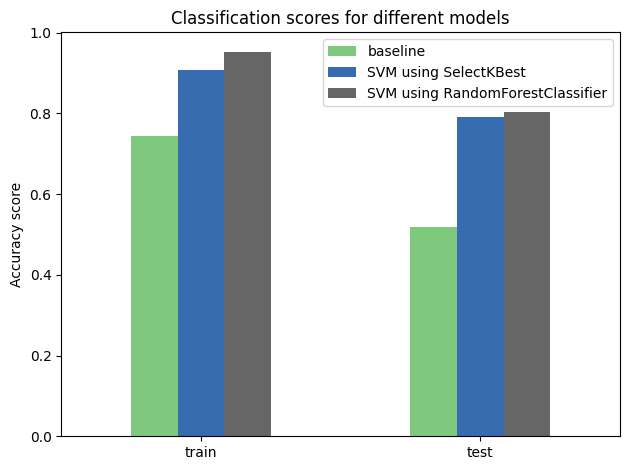

In [ ]:
# Convert scores into dataframe
scores = pd.DataFrame({
    'baseline': baseline_scores_clas,
    'SVM using SelectKBest': svm_scores,
    'SVM using RandomForestClassifier': svm_scores_rfc
})

# Plot all scores for classification models
plt.figure(figsize=(12, 12))
ax = scores.plot(kind='bar', colormap='Accent')
plt.xticks(rotation=0)
plt.title('Classification scores for different models')
plt.ylabel('Accuracy score')
plt.tight_layout()
plt.show()

The model using RFC for feature selection performs better than one using SelectKBest. Both mean cross-validated accuracy score and accuracy on train and test data have slightly improved.

### Inspecting feature selection

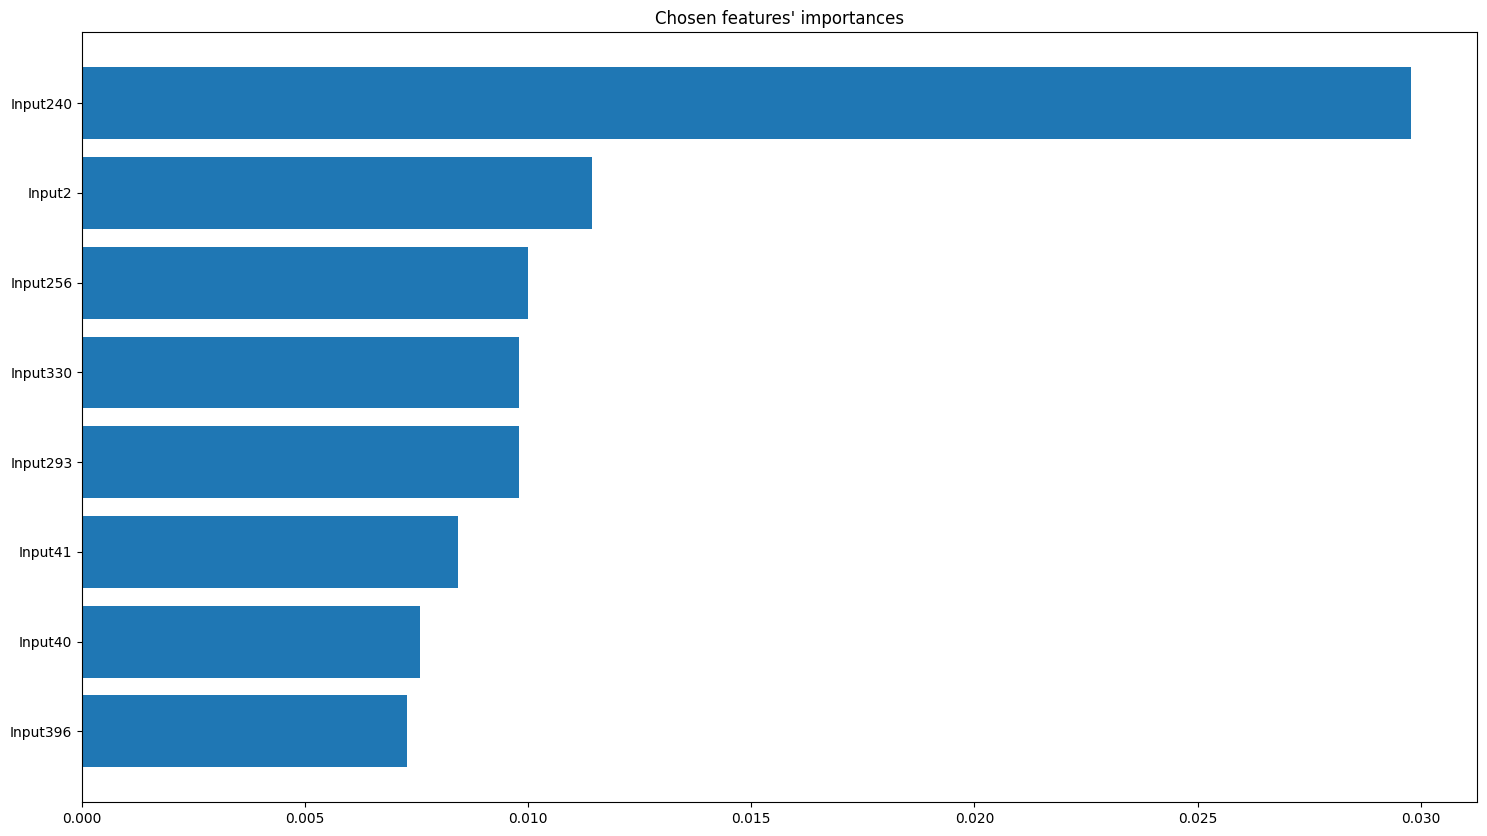

RFC chosen features: ['Input396', 'Input40', 'Input41', 'Input293', 'Input330', 'Input256', 'Input2', 'Input240']
SelectKBest chosen features: ['Input40', 'Input41', 'Input240', 'Input293', 'Input308', 'Input330', 'Input396']


In [ ]:
# Get features and their importances from RFC-based selection
features = svm_cv_rfc.best_estimator_.named_steps['feature_selection']

importance_features = pd.DataFrame({
    'features': X_train.columns[features.get_support()],
    'importance': features.estimator_.feature_importances_[features.get_support()]
})
importance_features.sort_values(by='importance', ascending=True, inplace=True)

plt.figure(figsize=(18,10))
plt.title('Chosen features\' importances')
plt.barh('features', 'importance', data=importance_features)
plt.show()

# Get features from SelectKBest selector
selector = SelectKBest(score_func=f_classif, k=7).fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]

print(f'RFC chosen features: {importance_features["features"].tolist()}')
print(f'SelectKBest chosen features: {selected_features.tolist()}')

The final model uses 8 features out of 400. Chosen features are similar to ones chosen by SelectKBest, but the model using those chosen using RandomForestClassifier performs slightly better.

## 3. Regression using Lasso

In [ ]:
# Import libraries
from sklearn.linear_model import Lasso

### Creating model with cross-validation for alpha optimization

Best alpha: 0.1274
R2 mean cross-validate score: 0.4678
R2 train score: 0.5040
RMSE train score: 2.5314
R2 test score: 0.5086
RMSE test score: 2.4371


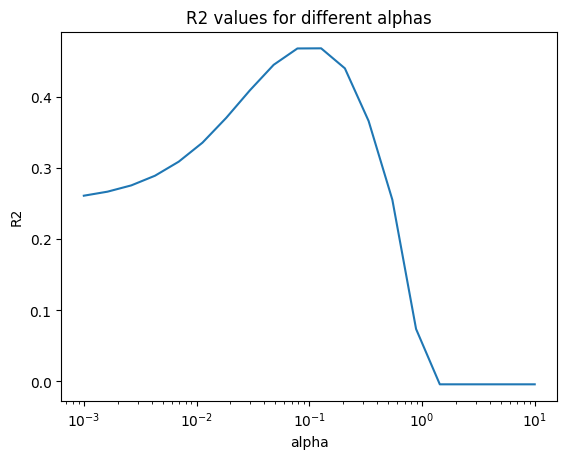

In [ ]:
X = data.iloc[:, 2:]
y = data['Output']

# Divide data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test alpha options
param_grid = {
    'alpha': np.logspace(-3, 1, 20)
}

lasso = Lasso(max_iter=50000)
lasso_grid = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)

print(f'Best alpha: {lasso_grid.best_params_["alpha"]:.4f}')
print(f'R2 mean cross-validate score: {lasso_grid.best_score_:.4f}')
print(f'R2 train score: {lasso_grid.score(X_train, y_train):.4f}')
print(f'RMSE train score: {root_mean_squared_error(y_train, lasso_grid.predict(X_train)):.4f}')
print(f'R2 test score: {lasso_grid.score(X_test, y_test):.4f}')
print(f'RMSE test score: {root_mean_squared_error(y_test, lasso_grid.predict(X_test)):.4f}')

# Plot the R2 value agains alphas
plt.plot(param_grid['alpha'], lasso_grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.title('R2 values for different alphas')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

The plot shows that the optimal alpha value should be between $10^{-2}$ and $10^0$. I will inspect this range more closely in next iteration.

In [ ]:
# Adjust alpha options
param_grid = {
    'alpha': np.logspace(-1.5, 0, 100)
}

# Use cross-validation for choosing the best option
lasso = Lasso(max_iter=50000)
lasso_grid = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)

print(f'Best alpha: {lasso_grid.best_params_["alpha"]:.4f}')
print(f'R2 mean cross-validated score: {lasso_grid.best_score_:.4f}')

lasso_scores = {'train': lasso_grid.score(X_train, y_train), 'test': lasso_grid.score(X_test, y_test)}
print(f'R2 train score: {lasso_scores["train"]:.4f}')
print(f'RMSE train score: {root_mean_squared_error(y_train, lasso_grid.predict(X_train)):.4f}')
print(f'R2 test score: {lasso_scores["test"]:.4f}')
print(f'RMSE test score: {root_mean_squared_error(y_test, lasso_grid.predict(X_test)):.4f}')

Best alpha: 0.0966
R2 mean cross-validated score: 0.4707
R2 train score: 0.5311
RMSE train score: 2.4613
R2 test score: 0.5087
RMSE test score: 2.4369


<Figure size 1200x1200 with 0 Axes>

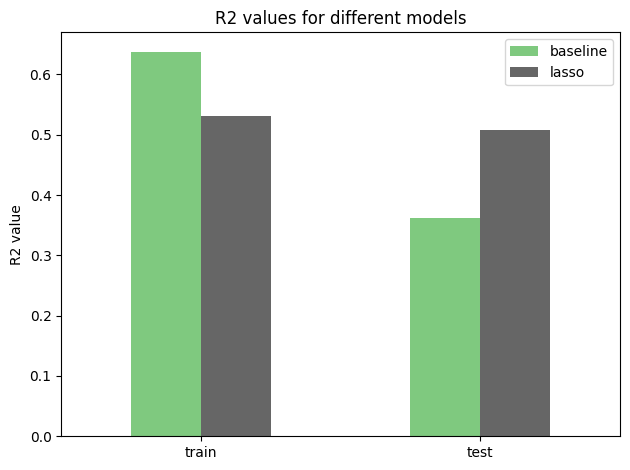

In [ ]:
# Convert scores into dataframe
scores = pd.DataFrame({
    'baseline': baseline_scores_reg,
    'lasso': lasso_scores
})

# Plot all scores for regression models
plt.figure(figsize=(12, 12))
ax = scores.plot(kind='bar', colormap='Accent')
plt.xticks(rotation=0)
plt.title('R2 values for different models')
plt.ylabel('R2 value')
plt.tight_layout()
plt.show()

The results for lasso model on data not seen in training are visibly better than for baseline model. The $R^2$ values are similar for train and test data, which is a good sign suggesting the model isn't overfitting. There is also slight improvement in RMSE value for lasso model.

### Inspecting feature selection

Number of used features: 67


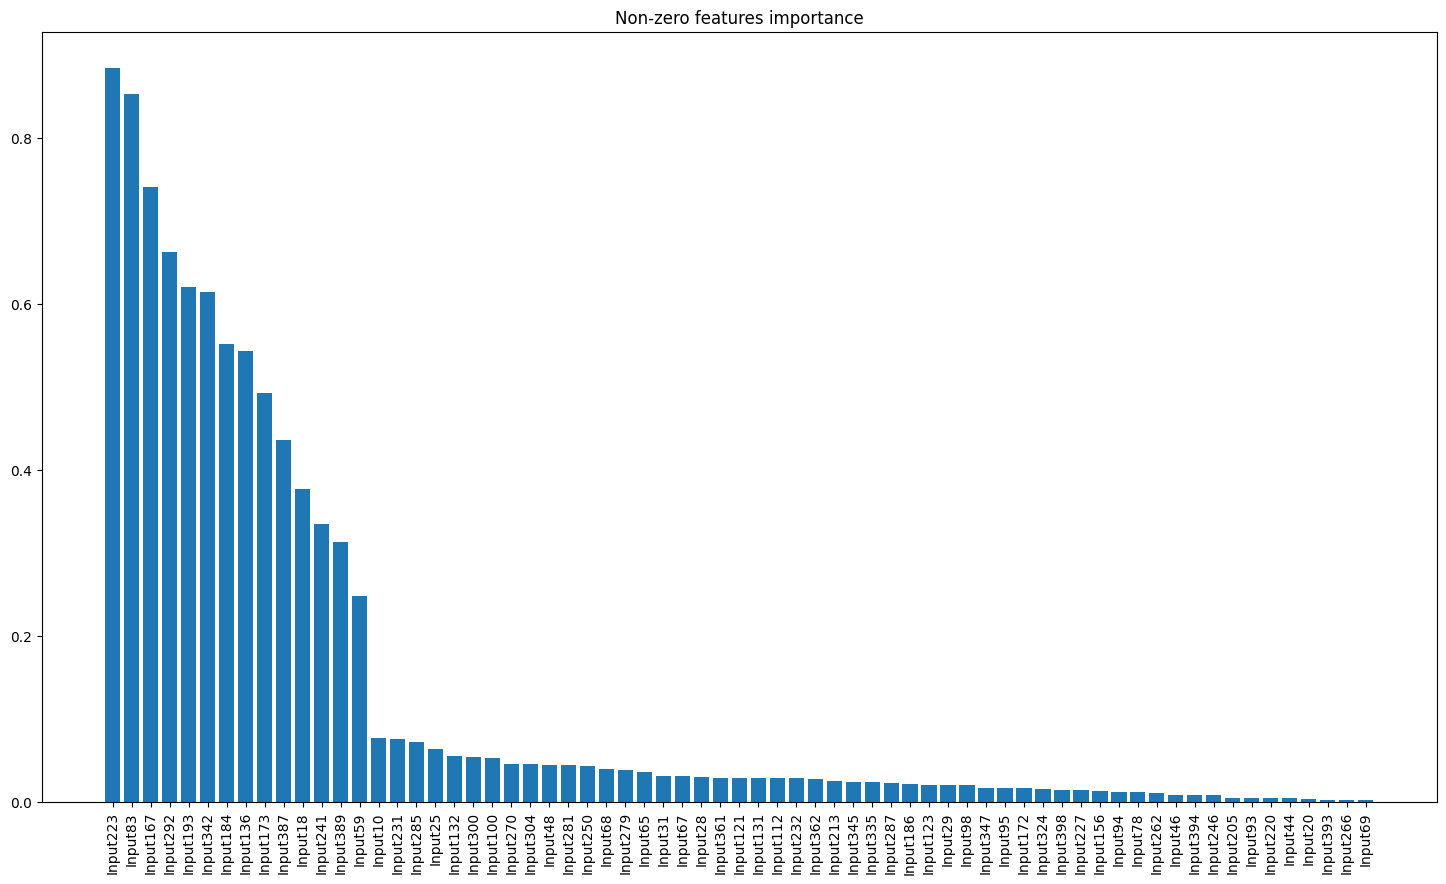

In [ ]:
# Train model with optimal alpha
lasso = Lasso(alpha=0.0966, max_iter=50000)
lasso.fit(X_train, y_train)

# Get features with non-zero importance
importance_features = pd.DataFrame({
    'features': X.columns[lasso.coef_ != 0],
    'importance': np.abs(lasso.coef_)[lasso.coef_ != 0]
})
print(f'Number of used features: {len(importance_features)}')

# Plot remaining features' importance
importance_features.sort_values(by='importance', ascending=False, inplace=True)
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
plt.title('Non-zero features importance')
plt.bar('features', 'importance', data=importance_features)
plt.show()

Lasso assigns coefficients 0 to non-significant input variables, so there is no need for seperate feature selection. The model has used 67 out of 400 features.

## 4. Processing validation data

Please note it is only necessary to run loading the data and all importing Python libraries sections for the following function to work.

In [ ]:
def compute_scores():
    validation_data = pd.read_csv('validation_data.csv', sep=';', header=0)

    X_train = data.iloc[:, 2:]
    output_train = data['Output']
    class_train = data['Class']

    X_val = validation_data.iloc[:, 2:]
    output_val = validation_data['Output']
    class_val = validation_data['Class']

    # Check performance on baseline models
    lr = LogisticRegression().fit(X_train, class_train)
    y_lr = lr.predict(X_val)
    print(f'Accuracy score for baseline classification model: {accuracy_score(class_val, y_lr):.4f}')

    ols = sm.OLS(output_train, X_train).fit()
    y_ols = ols.predict(X_val)
    print(f'R2 score for baseline regression model: {r2_score(output_val, y_ols):.4f}')

    # Check performance on advanced classification model
    y_train = data['Class']
    pipeline = Pipeline([
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=8)),
        ('svm', svm.SVC(C=3, gamma=1, kernel='rbf', random_state=42))
    ])
    pipeline.fit(X_train, class_train)
    print(f'Accuracy score for advanced classification model: {pipeline.score(X_val, class_val):.4f}')

    # Check performace on advanced regression model
    y_train = data['Output']
    lasso = Lasso(alpha=0.0966, max_iter=50000)
    lasso.fit(X_train, output_train)
    y_lasso = lasso.predict(X_val)
    print(f'R2 score for advanced regression model: {r2_score(output_val, y_lasso):.4f}')